In [1]:
# Homework 2 Part 1 (due 7/07/2024)

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R^2, and (5) plots the data and the model. Review and test the code.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [4]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


R2 0.03530218264671636


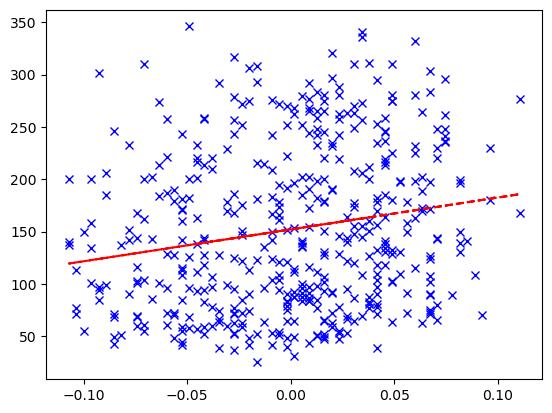

In [6]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

# select first variable
var_name1 = var_names[0]

# select data associated with the first variable
x1 = X[var_name1]

# turn that dataframe column into a nx1 numpy array
x1_data = np.array([x1.to_numpy()]).T

# fit model
_ = model.fit(x1_data,y.to_numpy())

# get model predictions for each x value
yHat = model.predict(x1_data)

# get residuals
resid = yHat-y

# get R2 value
R2 = model.score(x1_data,y)
print('R2', R2)

# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x1, yHat, ls='--', color='red')

### Step 2
Write code that fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

The variable of interest is: age
The RSS value is: 2528481.7816048963
The MSE value is: 5720.5470172056475
The RSE value is: 75.80599912703144
The R^2 value is: 0.03530218264671636
The t-statistic is: [4.02176107]
The R^2 value (calculated from the t-statistic) is: [0.0353794]
---
The variable of interest is: sex
The RSS value is: 2616148.8936170214
The MSE value is: 5918.888899586022
The RSE value is: 77.1089679611826
The R^2 value is: 0.0018543357106460823
The t-statistic is: [0.90616723]
The R^2 value (calculated from the t-statistic) is: [0.00185853]
---
The variable of interest is: bmi
The RSS value is: 1719581.8107738825
The MSE value is: 3890.456585461273
The RSE value is: 62.51512200285265
The R^2 value is: 0.3439237602253802
The t-statistic is: [15.221767]
The R^2 value (calculated from the t-statistic) is: [0.34443502]
---
The variable of interest is: bp
The RSS value is: 2110158.3448469597
The MSE value is: 4774.113902368687
The RSE value is: 69.25181889385091
The R^2 value 

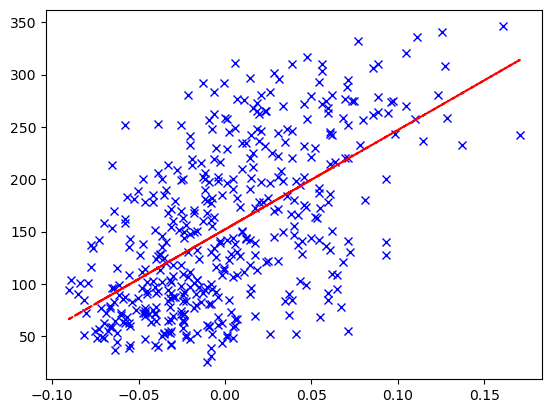

In [8]:
#Make a variable to contain the index and R^2 value of the model with the best quality of fit
best = 10
bestR2 = 0.0000000000000000000000000000000001

all_R2_values = [] # to be used in Step 4

#Go through each row (independent variable) in the data set
for index in range(10):

    #0.Select and format the relevant data 
    variable = var_names[index] #Select the variable of interest
    print("The variable of interest is: " + variable) #Print the variable name so you know what it is
    xn = X[variable] #Select data associated with the first variable
    xn_data = np.array([xn.to_numpy()]).T #Turn that dataframe column into a nx1 numpy array
    _ = model.fit(xn_data, y.to_numpy()) #Fit the model
    
    #1.1. Get model predictions for each x value and residuals
    yHat = model.predict(xn_data) #Get model predictions for each x value
    resid = yHat - y #Get residuals
    
    #2.1. Calculate the RSS
    data = pd.DataFrame({"real": y, "model": yHat}) 
    RSS = np.sum(np.square(data["model"] - data["real"]))
    print("The RSS value is: " + str(RSS))

    #2.2. Calculate the MSE
    MSE = RSS / len(y)
    print("The MSE value is: " + str(MSE))
          
    #2.3. Calculate the RSE
    RSE = np.sqrt(RSS / (len(y) - 2))
    print("The RSE value is: " + str(RSE))
       
    #2.4. Calculate the R^2
    R2 = model.score(xn_data, y) #Get R^2 value
    print("The R^2 value is: " + str(R2))
    all_R2_values.append(R2)

    #1.2. Do a t-test
    n = 442 #n is the number of samples
    coefficient = model.coef_
    ssxx = sum(np.power(xn_data, 2)) - (sum(xn_data))**2 / n
    t_stat = coefficient / (MSE / ssxx)**0.5
    print("The t-statistic is: " + str(t_stat))
    print("The R^2 value (calculated from the t-statistic) is: " + str(t_stat**2 / (t_stat**2 + (n - 1)))) # Used to check correctness of the t-test

    #Check if this model has a better quality of fit than the preceding ones, and update the best/bestR2 variables if it is
    if R2 > bestR2:
        best = index
        bestR2 = R2

    print("---")

#Generate a plot for the model with the best quality of fit
bestvariable = var_names[best] #Select the best-quality-of-fit variable
print("The model with the best quality of fit is based on the variable: " + bestvariable) #Print the variable name so you know what it is
xbest = X[bestvariable] #Select data associated with the first variable
xbest_data = np.array([xbest.to_numpy()]).T #Turn that dataframe column into a nx1 numpy array
_ = model.fit(xbest_data, y.to_numpy()) #Fit the model
yHatb = model.predict(xbest_data) #Get model predictions for each x value
    
plt.subplot(111) #Make a plot
plt.plot(xbest, y, marker = 'x', lw = 0, color = 'blue') #Plot data
plt.plot(xbest, yHatb, ls = '--', color = 'red') #Plot fit

### Step 3
Write code that fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

In [10]:
#Make/fit the full model
model = LinearRegression()
_ = model.fit(X, y.to_numpy())

#Get model predictions for each x value
yHat = model.predict(X)

#Calculate the mean value
yBar = np.mean(y)

#Calculate the explained, unexplained, and total variation in the data
variation_explained = sum([(val - yBar)**2 for val in yHat])
variation_unexplained = sum(np.power(np.subtract(y, yHat), 2))
total_variation = variation_explained + variation_unexplained

#Calculate the explained and unexplained variance in the data
n = 442 #n is the number of samples
variance_exp = variation_explained / (n - 1)
variance_unexp = variation_unexplained / (n - 1)

#1. Calculate the f-statistic
f_statistic = variance_exp / variance_unexp
print("The f-statistic is: " + str(f_statistic))

#2.1. Calculate the RSS
data = pd.DataFrame({"real": y, "model": yHat}) 
RSS = np.sum(np.square(data["model"] - data["real"]))
print("The RSS value is: " + str(RSS))

#2.2. Calculate the MSE
MSE = RSS / len(y)
print("The MSE value is: " + str(MSE))
      
#2.3. Calculate the RSE
RSE = np.sqrt(RSS / (len(y) - 2))
print("The RSE value is: " + str(RSE))
   
#2.4. Calculate the R^2
R2 = model.score(X, y) #Get R^2 value
print("The R^2 value is: " + str(R2))

The f-statistic is: 1.0736064868965953
The RSS value is: 1263985.7856333437
The MSE value is: 2859.6963475867506
The RSE value is: 53.59752762346887
The R^2 value is: 0.5177484222203498


### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

In [12]:
#Determine the relevant variables
var_names = X.columns

#Calculate the variation explained by the full model
variation_exp_full = variation_explained
SSE_full = variation_unexplained
f_stats = [] # f-statistic for each one

#Generate the reduced model (includes all variables except the relevant var_name)
for var_name in var_names:

    #Make a copy of the data to modify when making the reduced model by removing the relevant var_name
    X_reduced = X.copy(deep = True)
    del X_reduced[var_name]

    #Set the model type and fit it
    model_reduced = LinearRegression()
    _reduced = model_reduced.fit(X_reduced, y.to_numpy())

    #Get model predictions for each x value
    yHat_reduced = model_reduced.predict(X_reduced)

    #Calculate the mean value, explained variation, and the SSE
    yBar = np.mean(y)
    variation_exp_reduced = sum([(val - yBar)**2 for val in yHat_reduced])
    SSE_reduced = sum(np.power(np.subtract(y, yHat_reduced), 2))
    
    #Calculate the f-statistic and add it to a list
    ddof_error_full = n - 10 #10 = number of full-model parameters
    ddof_error_reduced = n - 9

    f_stat_reduced = ((SSE_reduced - SSE_full) / (ddof_error_reduced - ddof_error_full)) / (SSE_full / ddof_error_full)
    f_stats.append(f_stat_reduced)

#Print the f-statistic and R^2 for each reduced model
print("f_stats\t\t\tR2")
#Compare f-stats in reduced model to single-variable model R^2 values for each regression parameter
for i in range(10):
    print(var_names[i])
    print(f_stats[i], "\t", all_R2_values[i])

f_stats			R2
age
0.028131841657232842 	 0.03530218264671636
sex
15.379477821786441 	 0.0018543357106460823
bmi
61.189335575433724 	 0.3439237602253802
bp
24.642202765545946 	 0.1949061431435003
s1
3.6228003510064624 	 0.04495353245556555
s2
1.9819393039244082 	 0.030294651136685613
s3
0.22655560242164163 	 0.15585855244530533
s4
1.2051702853653385 	 0.18528968598509687
s5
19.14481550279769 	 0.3202231084297207
s6
1.0528385488354164 	 0.1462936157229343


Higher f-statistics for a variable generally correlate with higher R2 values for the best-fitting single-variable models.

The variables with the three highest f-stats are: bmi, bp, and s5.
The variables with the three highest R2 vals are: bmi, s5, and bp.

In general, while the correlation between the two metrics holds true, we see differences in variable rankings. This can be attributed to collinearity between the different independent variables (e.g. possible collinearity between bmi and bp, age and bmi, etc. etc.) that lead to second-order effects when considering multiple variables at once in a multi-linear model.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test. 

In [15]:
import sklearn.model_selection as model_select

In [16]:
X_train, X_test, y_train, y_test = model_select.train_test_split(X, y, test_size = 0.33, random_state = 100)

### Re: Step 2 (training set)

The variable of interest is: age
The RSS value is: 1776856.9174735183
The MSE value is: 6002.894991464589
The RSE value is: 77.74143690346023
The R^2 value is: 0.025158420347812682
The t-statistic is: [2.76428982]
The R^2 value (calculated from the t-statistic) is: [0.01703209]
---
The variable of interest is: sex
The RSS value is: 1816370.2349814416
The MSE value is: 6136.385928991357
The RSE value is: 78.60108174164834
The R^2 value is: 0.003480127358700069
The t-statistic is: [1.01671892]
The R^2 value (calculated from the t-statistic) is: [0.00233855]
---
The variable of interest is: bmi
The RSS value is: 1183924.0358435696
The MSE value is: 3999.743364336384
The RSE value is: 63.45827371485364
The R^2 value is: 0.35046071186700434
The t-statistic is: [12.64234318]
The R^2 value (calculated from the t-statistic) is: [0.26601393]
---
The variable of interest is: bp
The RSS value is: 1528555.1227353313
The MSE value is: 5164.037576808551
The RSE value is: 72.10525004556727
The R^2 va

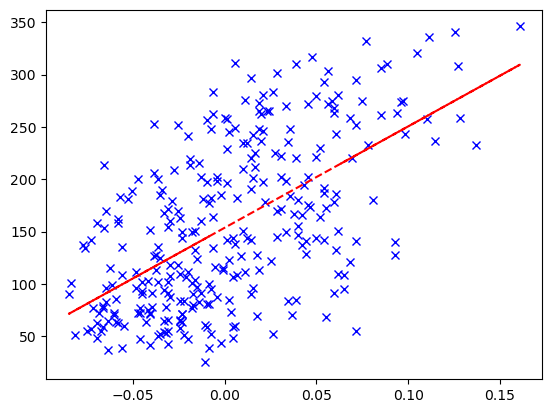

In [18]:
var_names = X.columns

#Make a variable to contain the index and R^2 value of the model with the best quality of fit
best = 10
bestR2 = 0.0000000000000000000000000000000001

#Go through each row (independent variable) in the data set
for index in range(10):

    #0.Select and format the relevant data 
    model_train = LinearRegression()
    
    variable = var_names[index] #Select the variable of interest
    print("The variable of interest is: " + variable) #Print the variable name so you know what it is
    xn = X_train[variable] #Select data associated with the first variable
    xn_data = np.array([xn.to_numpy()]).T #Turn that dataframe column into a nx1 numpy array
    _ = model_train.fit(xn_data, y_train.to_numpy()) #Fit the model
    
    #1.1. Get model predictions for each x value and residuals
    yHat = model_train.predict(xn_data) #Get model predictions for each x value
    resid = yHat - y_train #Get residuals
    
    #2.1. Calculate the RSS
    data = pd.DataFrame({"real": y_train, "model": yHat}) 
    RSS = np.sum(np.square(data["model"] - data["real"]))
    print("The RSS value is: " + str(RSS))

    #2.2. Calculate the MSE
    MSE = RSS / len(y_train)
    print("The MSE value is: " + str(MSE))
          
    #2.3. Calculate the RSE
    RSE = np.sqrt(RSS / (len(y_train) - 2))
    print("The RSE value is: " + str(RSE))
       
    #2.4. Calculate the R^2
    R2 = model_train.score(xn_data, y_train) #Get R^2 value
    print("The R^2 value is: " + str(R2))

    #1.2. Do a t-test
    n = 442
    coefficient = model_train.coef_
    ssxx = sum(np.power(xn_data, 2)) - (sum(xn_data))**2 / n
    t_stat = coefficient / (MSE / ssxx)**0.5
    print("The t-statistic is: " + str(t_stat))
    print("The R^2 value (calculated from the t-statistic) is: " + str(t_stat**2 / (t_stat**2 + (n - 1)))) # Used to check correctness of the t-test

    #Check if this model has a better quality of fit than the preceding ones, and update the best/bestR2 variables if it is
    if R2 > bestR2:
        best = index
        bestR2 = R2

    print("---")

#Generate a plot for the model with the best quality of fit
bestvariable = var_names[best] #Select the best-quality-of-fit variable
print("The model with the best quality of fit is based on the variable: " + bestvariable) #Print the variable name so you know what it is
xbest = X_train[bestvariable] #Select data associated with the first variable
xbest_data = np.array([xbest.to_numpy()]).T #Turn that dataframe column into a nx1 numpy array
_ = model_train.fit(xbest_data, y_train.to_numpy()) #Fit the model
yHatb = model_train.predict(xbest_data) #Get model predictions for each x value
    
plt.subplot(111) #Make a plot
plt.plot(xbest, y_train, marker = 'x', lw = 0, color = 'blue') #Plot data
plt.plot(xbest, yHatb, ls = '--', color = 'red') #Plot fit

### Re: Step 3 (training set)

In [20]:
# full model
model_train = LinearRegression()
_ = model_train.fit(X_train, y_train.to_numpy())

# predict yHat
yHat = model_train.predict(X_train)

# f-statistic = explained variance / unexplained variance
## y = original y
## yHat = predicted y
## yBar = mean y = mean(y)
yBar = np.mean(y_train)

variation_explained = sum([(val - yBar)**2 for val in yHat])
variation_unexplained = sum(np.power(np.subtract(y_train, yHat), 2))
total_variation = variation_explained + variation_unexplained

n = 442
variance_exp = variation_explained / (n - 1)
variance_unexp = variation_unexplained / (n - 1)

f_statistic = variance_exp / variance_unexp
print("The f-statistic is: " + str(f_statistic))

#2.1. Calculate the RSS
data = pd.DataFrame({"real": y_train, "model": yHat}) 
RSS = np.sum(np.square(data["model"] - data["real"]))
print("The RSS value is: " + str(RSS))

#2.2. Calculate the MSE
MSE = RSS / len(y_train)
print("The MSE value is: " + str(MSE))
      
#2.3. Calculate the RSE
RSE = np.sqrt(RSS / (len(y_train) - 2))
print("The RSE value is: " + str(RSE))
   
#2.4. Calculate the R^2
R2 = model_train.score(X_train, y_train) #Get R^2 value
print("The R^2 value is: " + str(R2))

The f-statistic is: 1.0728667340241427
The RSS value is: 879320.1609235269
The MSE value is: 2970.6762193362392
The RSE value is: 54.688983361372074
The R^2 value is: 0.5175763190243021


### Metrics for test set

In [22]:
yHat = model_train.predict(X_test)

#2.1. Calculate the RSS
data = pd.DataFrame({"real": y_test, "model": yHat}) 
RSS = np.sum(np.square(data["model"] - data["real"]))
print("The RSS value is: " + str(RSS))

#2.2. Calculate the MSE
MSE = RSS / len(y_test)
print("The MSE value is: " + str(MSE))
      
#2.3. Calculate the RSE
RSE = np.sqrt(RSS / (len(y_test) - 2))
print("The RSE value is: " + str(RSE))
   
#2.4. Calculate the R^2
R2 = model_train.score(X_test, y_test) #Get R^2 value
print("The R^2 value is: " + str(R2))

The RSS value is: 397937.92013396206
The MSE value is: 2725.6021926983703
The RSE value is: 52.56860069193463
The R^2 value is: 0.4933218215028662
